# Обучим gpt2 на данных

In [7]:
from transformers import GPT2Tokenizer, TFGPT2Model
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

In [9]:
device = 'cpu' if not torch.cuda.is_available() else 'cuda'
device

'cuda'

In [3]:
model = AutoModelForCausalLM.from_pretrained("gpt2", torch_dtype=torch.float16)
model.to(device)

/home/motatasher/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/motatasher/.local/lib/python3.10/site-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
/home/motatasher/.local/lib/python3.10/site-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
/home/motatasher/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in ver

KeyboardInterrupt: 

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("gpt2")

In [40]:
prompt = "Hello, tell me how reconstruct you for predict volume on defu crypto market"

In [41]:
model_inputs = tokenizer([prompt], return_tensors="pt").to(device)

In [42]:
generated_ids = model.generate(**model_inputs, max_new_tokens=1000, do_sample=True)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [47]:
print(tokenizer.batch_decode(generated_ids)[0])

Hello, tell me how reconstruct you for predict volume on defu crypto market and for time series in crypto.

The real question we need are whether volume and price (for time series, period of time) for each and any crypto.

There are many ways that they could come from various sources.

It could come through a network, by running a web site and by simply running an application.

Any of these mechanisms could be built on blockchain and a blockchain can be used as a proof of work in a cryptographic proof.

It might be possible to build a whole business, like a business server for storing all transactions of people's transactions. In that model, it could be added into an existing blockchain as a proof of address.

It might also come through a blockchain and maybe a blockchain could contain a public key, which could be used to encrypt or re-ignite the public keys.

In this way even if a proof of address is established, it can also provide data to be stored on the network as proof.

Here is 

# Testing crio
 

In [1]:
import pandas as pd
import numpy as np
import json
import typing as tp
from tqdm.notebook import tqdm
from plotly_resampler import FigureResampler

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split

In [3]:
import Code.Dataloader as DataloaderLib
import Code.Logger as LogsLib
import Code.Dataset as DatasetLib
import Code.ModelBertV1 as ModelLib
import Code.Train as TrainLib

%load_ext autoreload
%autoreload 2

import importlib
importlib.reload(DataloaderLib)
importlib.reload(DatasetLib)
importlib.reload(LogsLib)
importlib.reload(ModelLib)
importlib.reload(TrainLib)

import Code.Dataloader as DataloaderLib
import Code.Logger as LogsLib
import Code.Dataset as DatasetLib
import Code.ModelBertV1 as ModelLib
import Code.Train as TrainLib

/home/motatasher/.local/lib/python3.10/site-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
2025-01-24 01:28:15.130922: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-24 01:28:15.140315: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-24 01:28:15.152574: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-24 01:2

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# start_ind = int(1e7)
# transactions = DataloaderLib.GetTransactionsByInd(range(start_ind, start_ind + 150), logger_fake='logger_loader')

In [6]:
# last_ind = int(2e7 + 1e6)
# size = 100
# transactions = DataloaderLib.GetTransactionsByInd(range(last_ind, last_ind - size, -1), logger_fake='logger_loader')
# df_to_for_predict = transactions.loc[:, DataloaderLib.useful_columns]

In [7]:
# last_ind = int(2e7 + 1e6)
# size = 4000
# transactions = DataloaderLib.GetTransactionsByInd(range(last_ind, last_ind - size, -1), logger_fake='logger_loader')
# df_to_for_predict = transactions.loc[:, DataloaderLib.useful_columns]

In [8]:
# last_ind = int(2e7 + 1e6)
# size = 6000
# transactions = DataloaderLib.GetTransactionsByInd(range(last_ind, last_ind - size, -1), logger_fake='logger_loader')
# dataset = transactions.loc[:, DataloaderLib.useful_columns]

In [11]:
cnt_trades = 500_000
df_raw = DataloaderLib.DatasetTimeBoomAuthorDependence(cnt_trades, count_people=20, cnt_boom=cnt_trades // 100, sigma=10000)

  0%|          | 0/5000 [00:00<?, ?it/s]

Write at logger: logs/logs_732.log


In [12]:
FigureResampler(px.line(x=df_raw.timestamp, y=df_raw.value, line_shape='hv'))

In [14]:
(df_raw.value - df_raw.value.mean()).std(), (df_raw.value - df_raw.value.mean()).std() ** 2

(4.018915283173273, 16.15168005332371)

In [15]:
# df_raw = DataloaderLib.SimpleDataloader(500_000, count_people=10)
df_to_for_predict = df_raw

In [16]:
train_dataset, val_dataset = train_test_split(df_raw, test_size=1/4)

In [17]:
train_dataset.shape, val_dataset.shape

((375000, 4), (125000, 4))

# Смотрим на датасет

In [18]:
df_to_for_predict

,from,to,value,timestamp
0,5,16,7.339937,2.796537
1,18,9,7.937161,3.813882
2,0,6,9.003398,4.917666
3,0,5,6.411701,6.888963
4,12,1,11.287189,9.863344
...,...,...,...,...
499995,11,5,1.109981,999863.448502
499996,9,3,1.398188,999866.289407
499997,17,7,1.544985,999867.905888
499998,11,9,1.571949,999869.399213


In [19]:
df_to_for_predict.head(5)

,from,to,value,timestamp
0,5,16,7.339937,2.796537
1,18,9,7.937161,3.813882
2,0,6,9.003398,4.917666
3,0,5,6.411701,6.888963
4,12,1,11.287189,9.863344


In [20]:
len(df_to_for_predict['from'].value_counts())

20

In [21]:
# df_to_for_predict['to'].value_counts()[1038152369971993893212000844348416056966454179089]

In [22]:
# df_to_for_predict.groupby('from').value.mean()[1038152369971993893212000844348416056966454179089]

In [23]:
mean_sell = df_to_for_predict.groupby('from').value.mean()

In [24]:
top_sellers = df_to_for_predict['from'].value_counts().keys().sort_values()
top_sellers

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19],
           dtype='int64')

In [25]:
top_sellers

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19],
           dtype='int64')

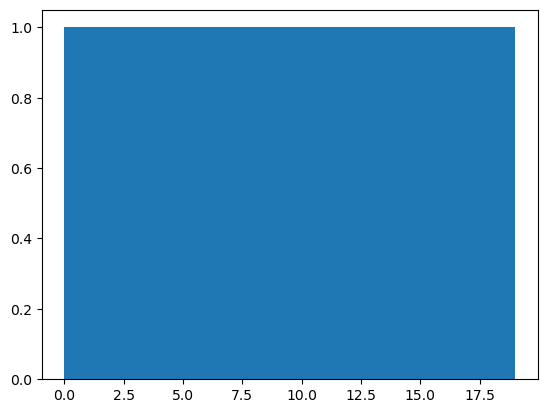

In [26]:
plt.hist(top_sellers[top_sellers < 20], bins=20);

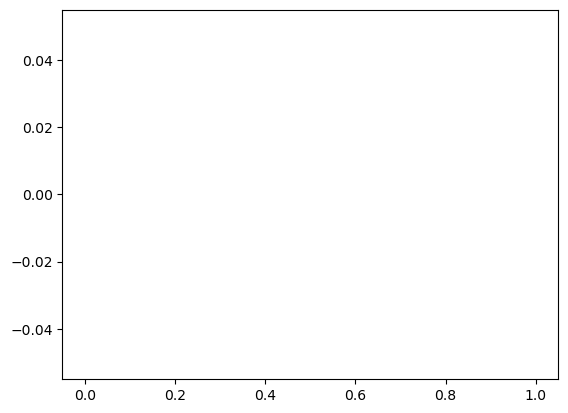

In [27]:
plt.hist(top_sellers[(top_sellers > 20) & (top_sellers <= 100)], bins=40);

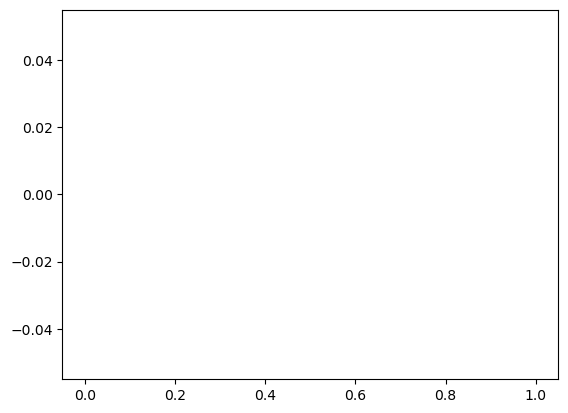

In [28]:
plt.hist(top_sellers[top_sellers > 100], bins=50);

In [29]:
# pd.DataFrame(
#     [df_to_for_predict.loc[df_to_for_predict['from'] == ind, 'value'].describe().values.reshape(8) for ind in top_sellers],
#     index=top_sellers,
#     columns=df_to_for_predict.loc[df_to_for_predict['from'] == top_sellers[0], 'value'].describe().index
#     )


# Bert!!!

In [30]:
import datetime
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import BertConfig, BertModel
import numpy as np

In [31]:
cnt_known_address = int(1e3)
known_address = pd.concat([df_to_for_predict['to'], df_to_for_predict['from']]).value_counts()[:cnt_known_address].keys().sort_values()

In [32]:
known_address

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19],
           dtype='int64')

In [33]:
df_raw

,from,to,value,timestamp
0,5,16,7.339937,2.796537
1,18,9,7.937161,3.813882
2,0,6,9.003398,4.917666
3,0,5,6.411701,6.888963
4,12,1,11.287189,9.863344
...,...,...,...,...
499995,11,5,1.109981,999863.448502
499996,9,3,1.398188,999866.289407
499997,17,7,1.544985,999867.905888
499998,11,9,1.571949,999869.399213


In [34]:
dataset = DatasetLib.TransactionDataset(df_raw, list(known_address), 100)
for name, value in dataset[0].items():
    print(f"{name}: {value.shape}")

numeric_features: torch.Size([100, 1])
from_address: torch.Size([100])
to_address: torch.Size([100])
time_features: torch.Size([100, 3])
value: torch.Size([100])


/home/motatasher/Documents/Education/University/7 sem/diploma/Diploma/Code/Dataset.py:49: UserWarning:

The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3683.)



In [35]:
device = 'cuda'

In [36]:
model = ModelLib.BertForTransactionRegression(len(known_address), 64).to(device)

In [37]:
dataset_params = dict(
    known_address = list(known_address),
    sample_len = 100,
)

In [38]:
# thr = 1 / 3727.02

In [39]:
# train_dataset.value = 1
# val_dataset.value = 1

In [40]:
train_dataloader = torch.utils.data.DataLoader(
    DatasetLib.TransactionDataset(train_dataset, **dataset_params),
    batch_size=16,
    shuffle=True,
    num_workers=2)

val_dataloader = torch.utils.data.DataLoader(
    DatasetLib.TransactionDataset(val_dataset, **dataset_params),
    batch_size=16,
    shuffle=True,
    num_workers=2)

In [41]:
TrainLib.train_model(model, TrainLib.scalar_dot_predictor, train_dataloader,
                     val_dataloader, 1000, 3e-7, start_epoch=0, gamma=0.8, step_size=10)

Epoch [133/1000], Train Loss: 15.7168, Test Loss: 15.8250


Coef: 0.1677721600000001


  0%|          | 0/235 [00:00<?, ?it/s]

KeyboardInterrupt: 